In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_csv("../data/processed/merged_dataset.csv", index_col=0, parse_dates=True)
df.head()

,AAPL,ABBV,ABT,ADBE,AMZN,AVGO,AXP,BA,BAC,BLK,...,V,WFC,XOM,Mkt-RF,SMB,HML,RMW,CMA,RF,Market
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.099608,-0.032949,-0.047194,-0.039498,-0.025241,-0.088951,-0.019520,-0.039869,-0.016026,-0.029377,...,-0.036037,-0.007882,-0.015354,-0.0245,0.0048,0.0118,-0.0022,0.0091,0.0001,-0.0244
2019-01-04,0.042690,0.032217,0.028541,0.048632,0.050064,0.009828,0.045061,0.052042,0.041531,0.036616,...,0.043081,0.029633,0.036870,0.0355,0.0035,-0.0069,-0.0011,-0.0062,0.0001,0.0356
2019-01-07,-0.002226,0.014596,0.014975,0.013573,0.034353,0.020366,0.005428,0.003149,-0.000782,0.002782,...,0.018032,-0.006465,0.005200,0.0094,0.0087,-0.0075,-0.0074,-0.0045,0.0001,0.0095
2019-01-08,0.019063,0.004647,-0.012006,0.014918,0.016612,-0.008026,0.004889,0.037853,-0.001957,0.012726,...,0.005439,-0.002099,0.007271,0.0101,0.0044,-0.0063,0.0034,-0.0012,0.0001,0.0102
2019-01-09,0.016982,-0.032823,0.016691,0.011819,0.001714,0.043250,0.001825,0.009691,0.009800,0.005730,...,0.011769,0.005469,0.005275,0.0052,0.0050,0.0011,0.0009,-0.0020,0.0001,0.0053


In [2]:
window = 126 # 6months
def rolling_beta(stock_returns, factor_returns, window):
    betas = []

    for i in range(window, len(stock_returns)):
        y = stock_returns.iloc[i-window:i]
        X = factor_returns.iloc[i-window:i]
        X = sm.add_constant(X)

        model = sm.OLS(y, X, missing='drop').fit()
        betas.append(model.params)

    beta_df = pd.DataFrame(betas, index=stock_returns.index[window:])
    return beta_df

In [3]:
factor_cols = ["Market", "SMB", "HML", "RMW", "CMA"]
factor_data = df[factor_cols]

In [4]:
stock = "AAPL"

rolling_betas_aapl = rolling_beta(df[stock], factor_data, window)
rolling_betas_aapl.head()

,const,Market,SMB,HML,RMW,CMA
Date,,,,,,
2019-07-05,-0.000706,1.134954,-0.384804,-0.053462,0.980163,-2.422725
2019-07-08,0.000113,0.975775,-0.220324,0.003730,0.813300,-2.289251
2019-07-09,-0.000084,1.050282,-0.206998,-0.026768,0.837254,-2.149292
2019-07-10,0.000075,1.038287,-0.169562,-0.047415,0.758184,-2.174944
2019-07-11,0.000073,1.034869,-0.179234,-0.041963,0.746962,-2.181862


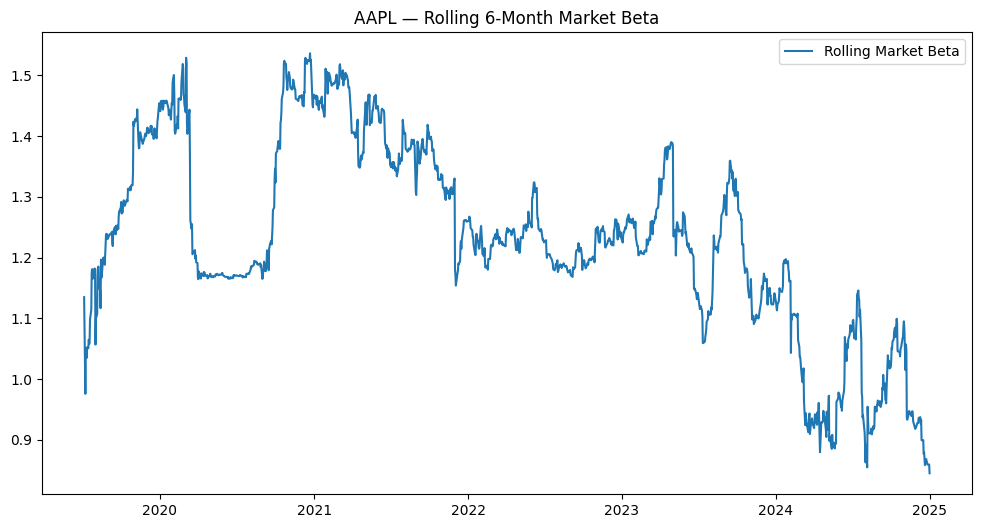

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(rolling_betas_aapl["Market"], label="Rolling Market Beta")
plt.title("AAPL — Rolling 6-Month Market Beta")
plt.legend()
plt.show()

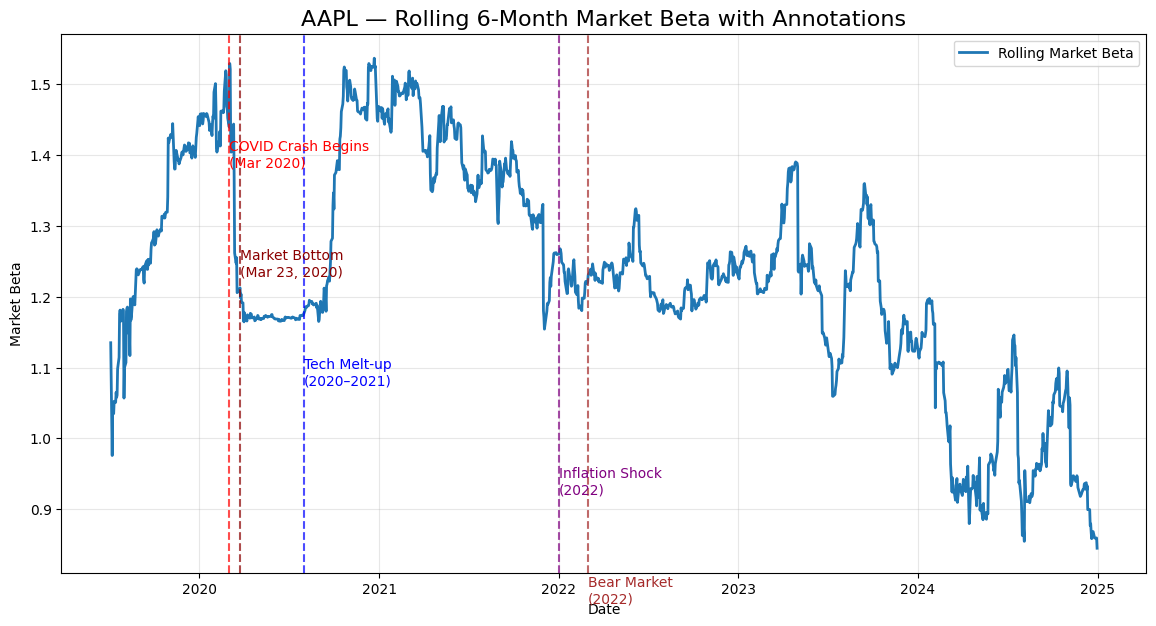

In [6]:
plt.figure(figsize=(14,7))

#these dates are based of chat-gpt
covid_start      = pd.to_datetime("2020-03-01")
covid_bottom     = pd.to_datetime("2020-03-23")
melt_up_start    = pd.to_datetime("2020-08-01")
inflation_start  = pd.to_datetime("2022-01-01")
bear_start       = pd.to_datetime("2022-03-01")

plt.plot(rolling_betas_aapl["Market"], label="Rolling Market Beta", linewidth=2)

plt.title("AAPL — Rolling 6-Month Market Beta with Annotations", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Market Beta")

plt.axvline(covid_start, color="red", linestyle="--", alpha=0.7)
plt.text(covid_start,
         rolling_betas_aapl["Market"].max()*0.9,
         "COVID Crash Begins\n(Mar 2020)",
         color="red")

plt.axvline(covid_bottom, color="darkred", linestyle="--", alpha=0.7)
plt.text(covid_bottom,
         rolling_betas_aapl["Market"].max()*0.8,
         "Market Bottom\n(Mar 23, 2020)",
         color="darkred")

plt.axvline(melt_up_start, color="blue", linestyle="--", alpha=0.7)
plt.text(melt_up_start,
         rolling_betas_aapl["Market"].max()*0.7,
         "Tech Melt-up\n(2020–2021)",
         color="blue")

plt.axvline(inflation_start, color="purple", linestyle="--", alpha=0.7)
plt.text(inflation_start,
         rolling_betas_aapl["Market"].max()*0.6,
         "Inflation Shock\n(2022)",
         color="purple")

plt.axvline(bear_start, color="brown", linestyle="--", alpha=0.7)
plt.text(bear_start,
         rolling_betas_aapl["Market"].max()*0.5,
         "Bear Market\n(2022)",
         color="brown")

plt.grid(alpha=0.3)
plt.legend()
plt.show()
